# Datan esikäsittely

Tehtävä 1


Haetaan data https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease ucilmlrepo kirjaston avulla

In [270]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
df = chronic_kidney_disease.data.original
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

Muokataan dataa siten, että siellä on vain:

- age
- blood pressure
- specific gravity
- albumin
- sugar
- blood glucose random
- blood urea
- sodium
- potassium
- hemoglobin
- packed cell volume
- white blood cell count
- red blood cell count
- class

In [271]:
df.drop(columns=['rbc', 'pc', 'pcc', 'ba', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',], inplace=True)
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


Seuraavaksi muutetaan hemo sarake g/l muotoon

In [272]:
df['hemo'] = df['hemo'] / 10

In [273]:
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,1.13,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,notckd


Tarkistetaan class sarakkeen uniikit arvot

In [274]:
print(df['class'].unique())

['ckd' 'ckd\t' 'notckd']


Jaetaan class sarake kahteen luokkaan 'ckd' + 'ckd\t' ja 'notckd' -> 'a' ja 'c'

In [275]:
df['class']= df['class'].str.replace('notckd', 'c')
df['class'] = df['class'].str.replace('ckd\t', 'a')
df['class']= df['class'].str.replace('ckd', 'a')
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,a
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,1.13,38.0,6000.0,NaN,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,c


ds.shape == tuple eli rivien määrä ja columns määrä [400, 15]  , koska shape[1] -> valitaan vain sarakkeet
thresh = c_cols - 2 -> eli rivien määrä - 2 on onltava muuta kuin NaN niin ne säilyy

Tässä vaiheessa pudotetaan rivit, joissa on kolme tai enemmän NaN arvoja

In [276]:
print(f"Data shape ennen poistoja: {df.shape}")
n_cols = df.shape[1]
df = df.dropna(thresh=n_cols -2)
print(f"Data shape poistojen jälkeen: {df.shape}")
df

Data shape ennen poistoja: (400, 14)
Data shape poistojen jälkeen: (265, 14)


,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,1.22,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,1.24,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,c


Jaetaan data kahteen osaan, luokka a (affected) ja luokka c (control)

In [277]:
mask_a = df['class'].str.strip().eq('a')
mask_c = df['class'].str.strip().eq('c')

df_a = df.loc[mask_a].copy()
df_c = df.loc[mask_c].copy()

print(f"Dataframe a shape: {df_a.shape}")
print(f"Dataframe c shape: {df_c.shape}")

df_a

Dataframe a shape: (126, 14)
Dataframe c shape: (139, 14)


,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,1.22,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,1.24,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,1.34,47.0,11000.0,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,1.22,40.0,9800.0,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,0.86,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,1.26,37.0,10200.0,4.1,a


In [278]:
df_c

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,1.50,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,1.70,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,1.59,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,1.54,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,1.30,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,c


Seuraavaksi tutkitaan dataa visuaalisesti käyttämällä matplotlib kirjastoa

In [279]:
import matplotlib.pyplot as plt

def plot_data(df_c):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(df_c.select_dtypes(include=['int', 'float'])):
        plt.subplot(5, 3, i + 1)
        df_c[col].plot(kind='hist', title=col)
        plt.xlabel(col)

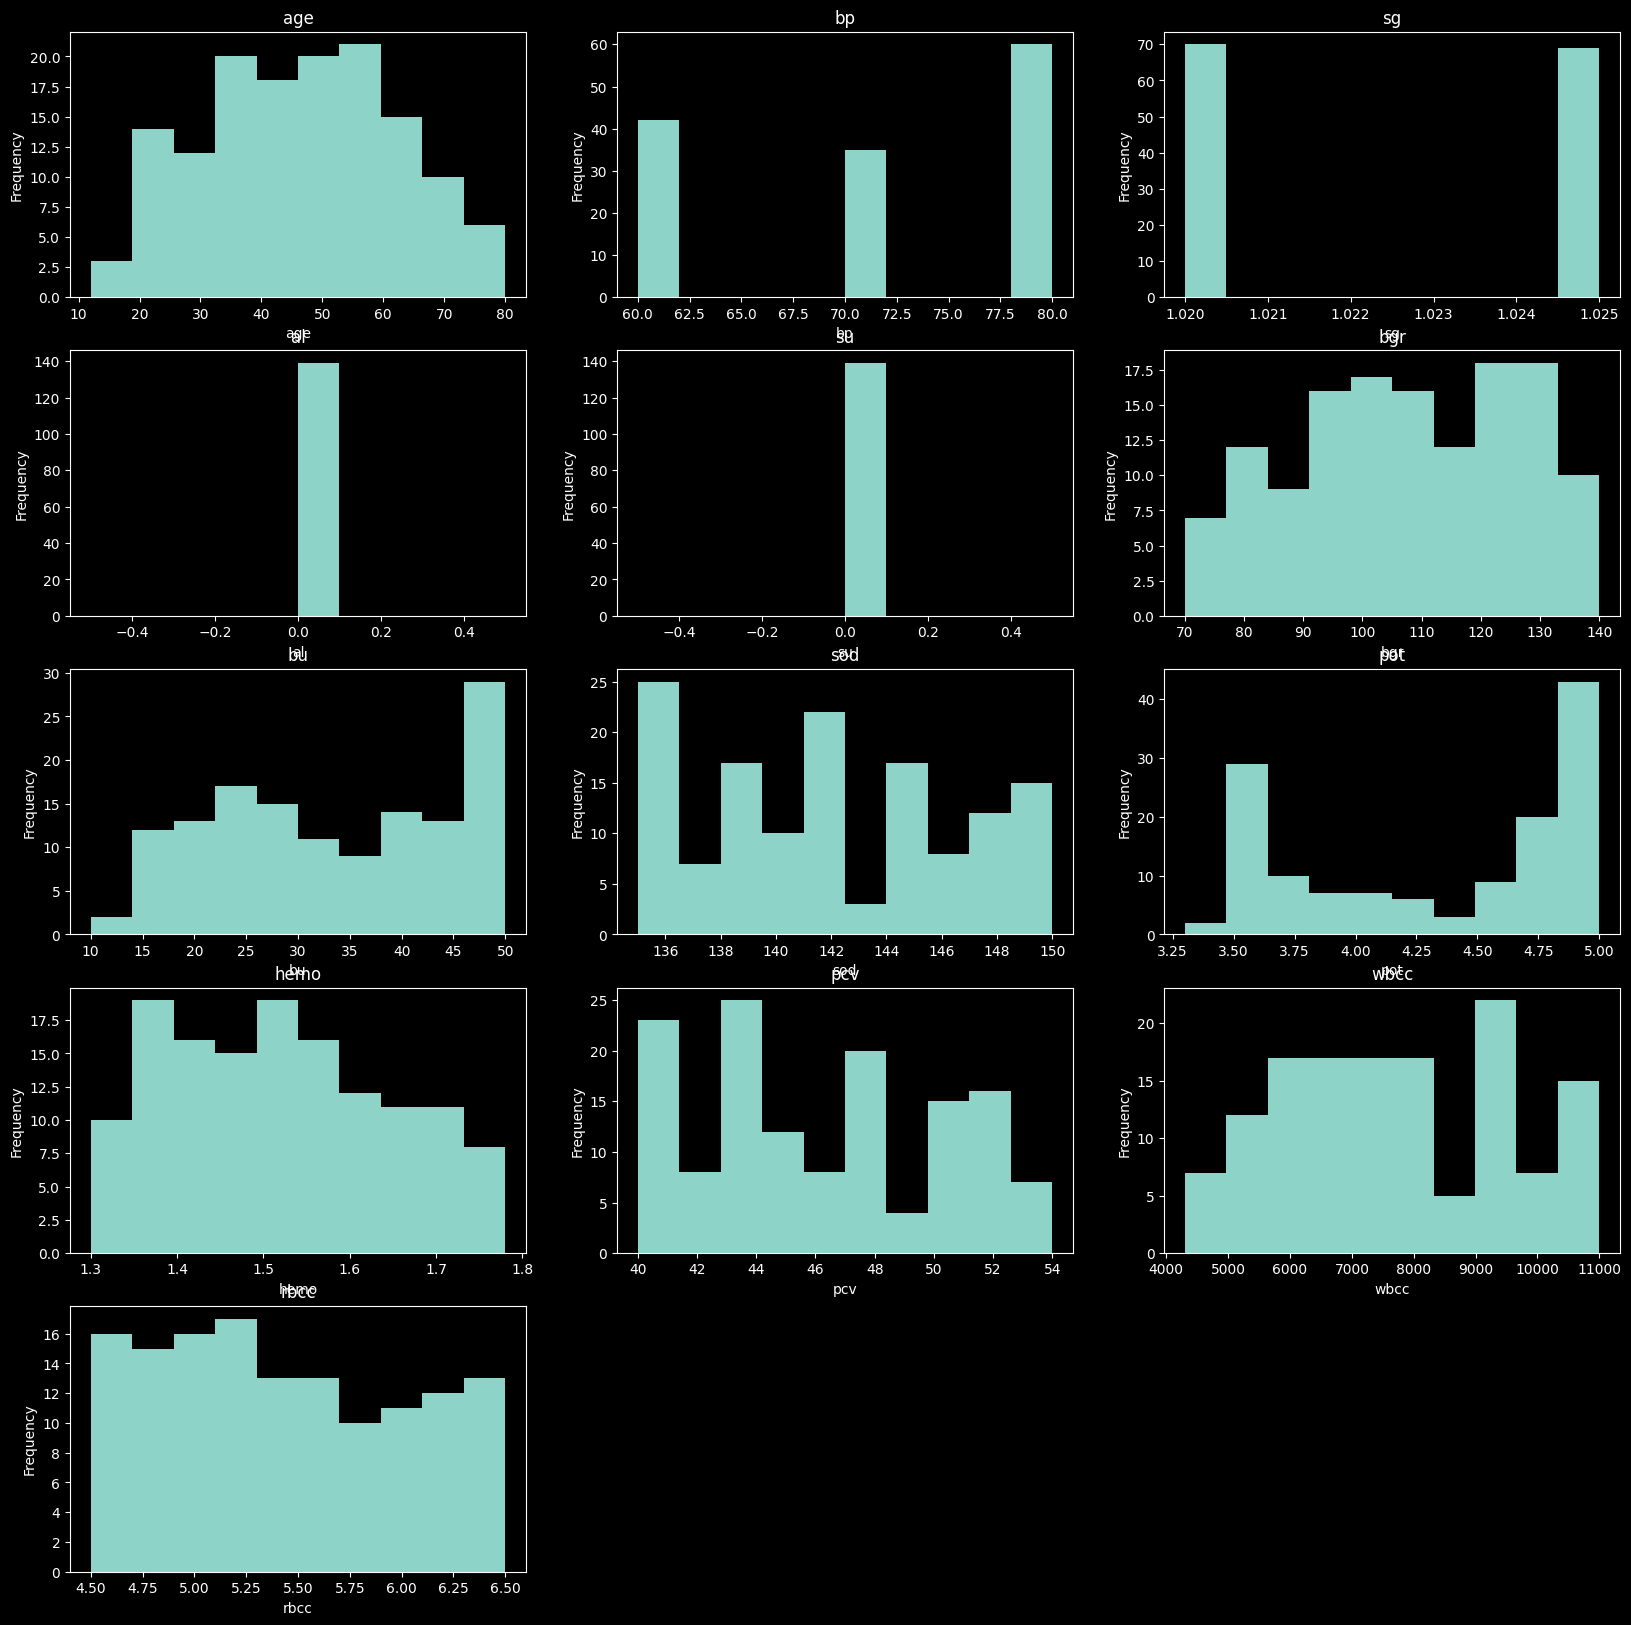

In [280]:
plot_data(df_c)

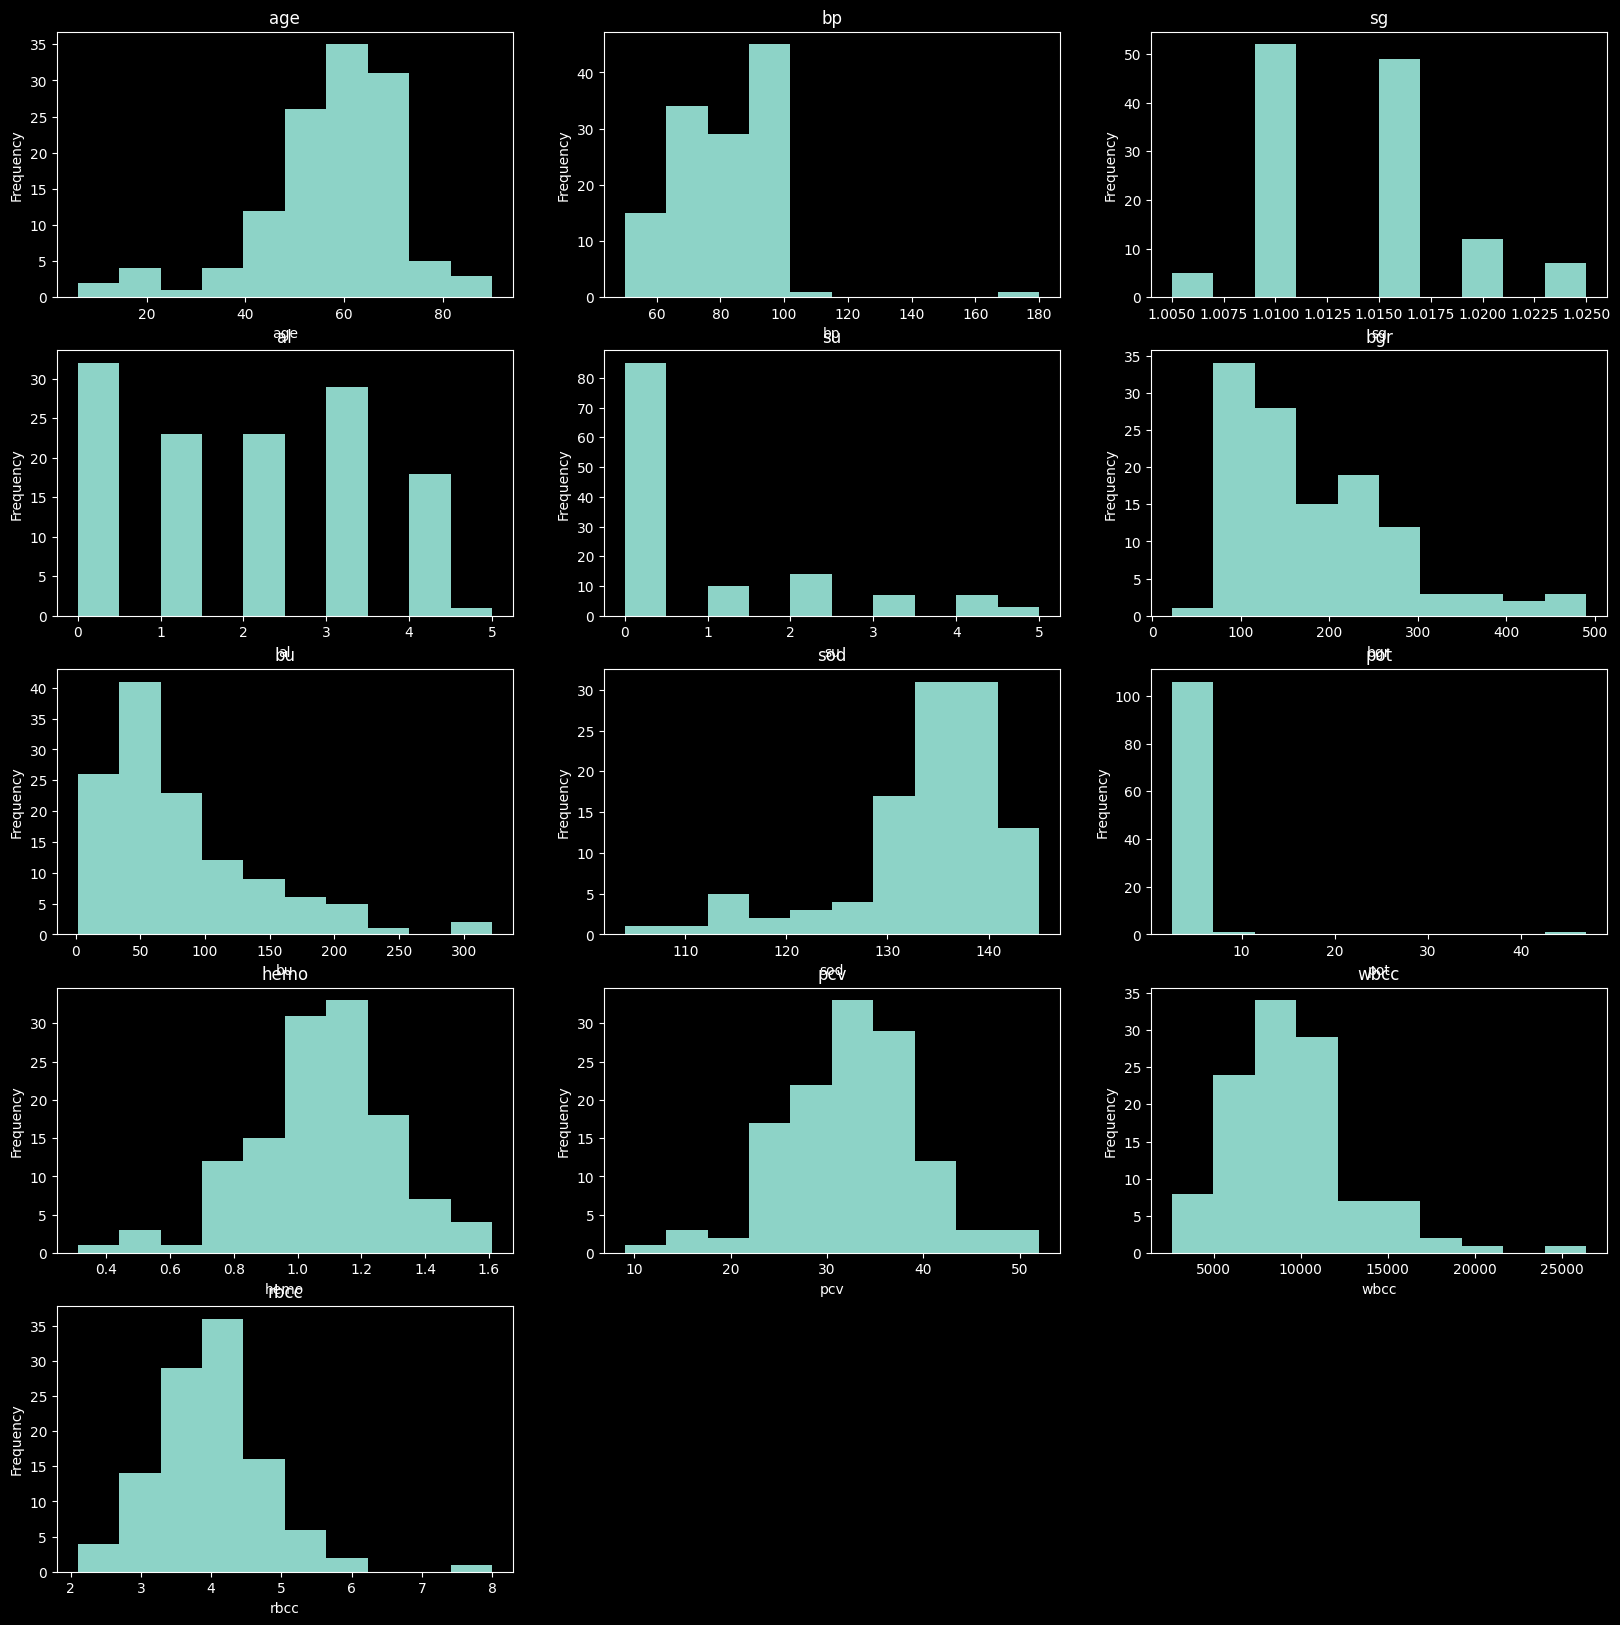

In [281]:
plot_data(df_a)

Tässä poistetaan outlierit siten, että bp on välillä 30-120 ja pot on välillä 0-20

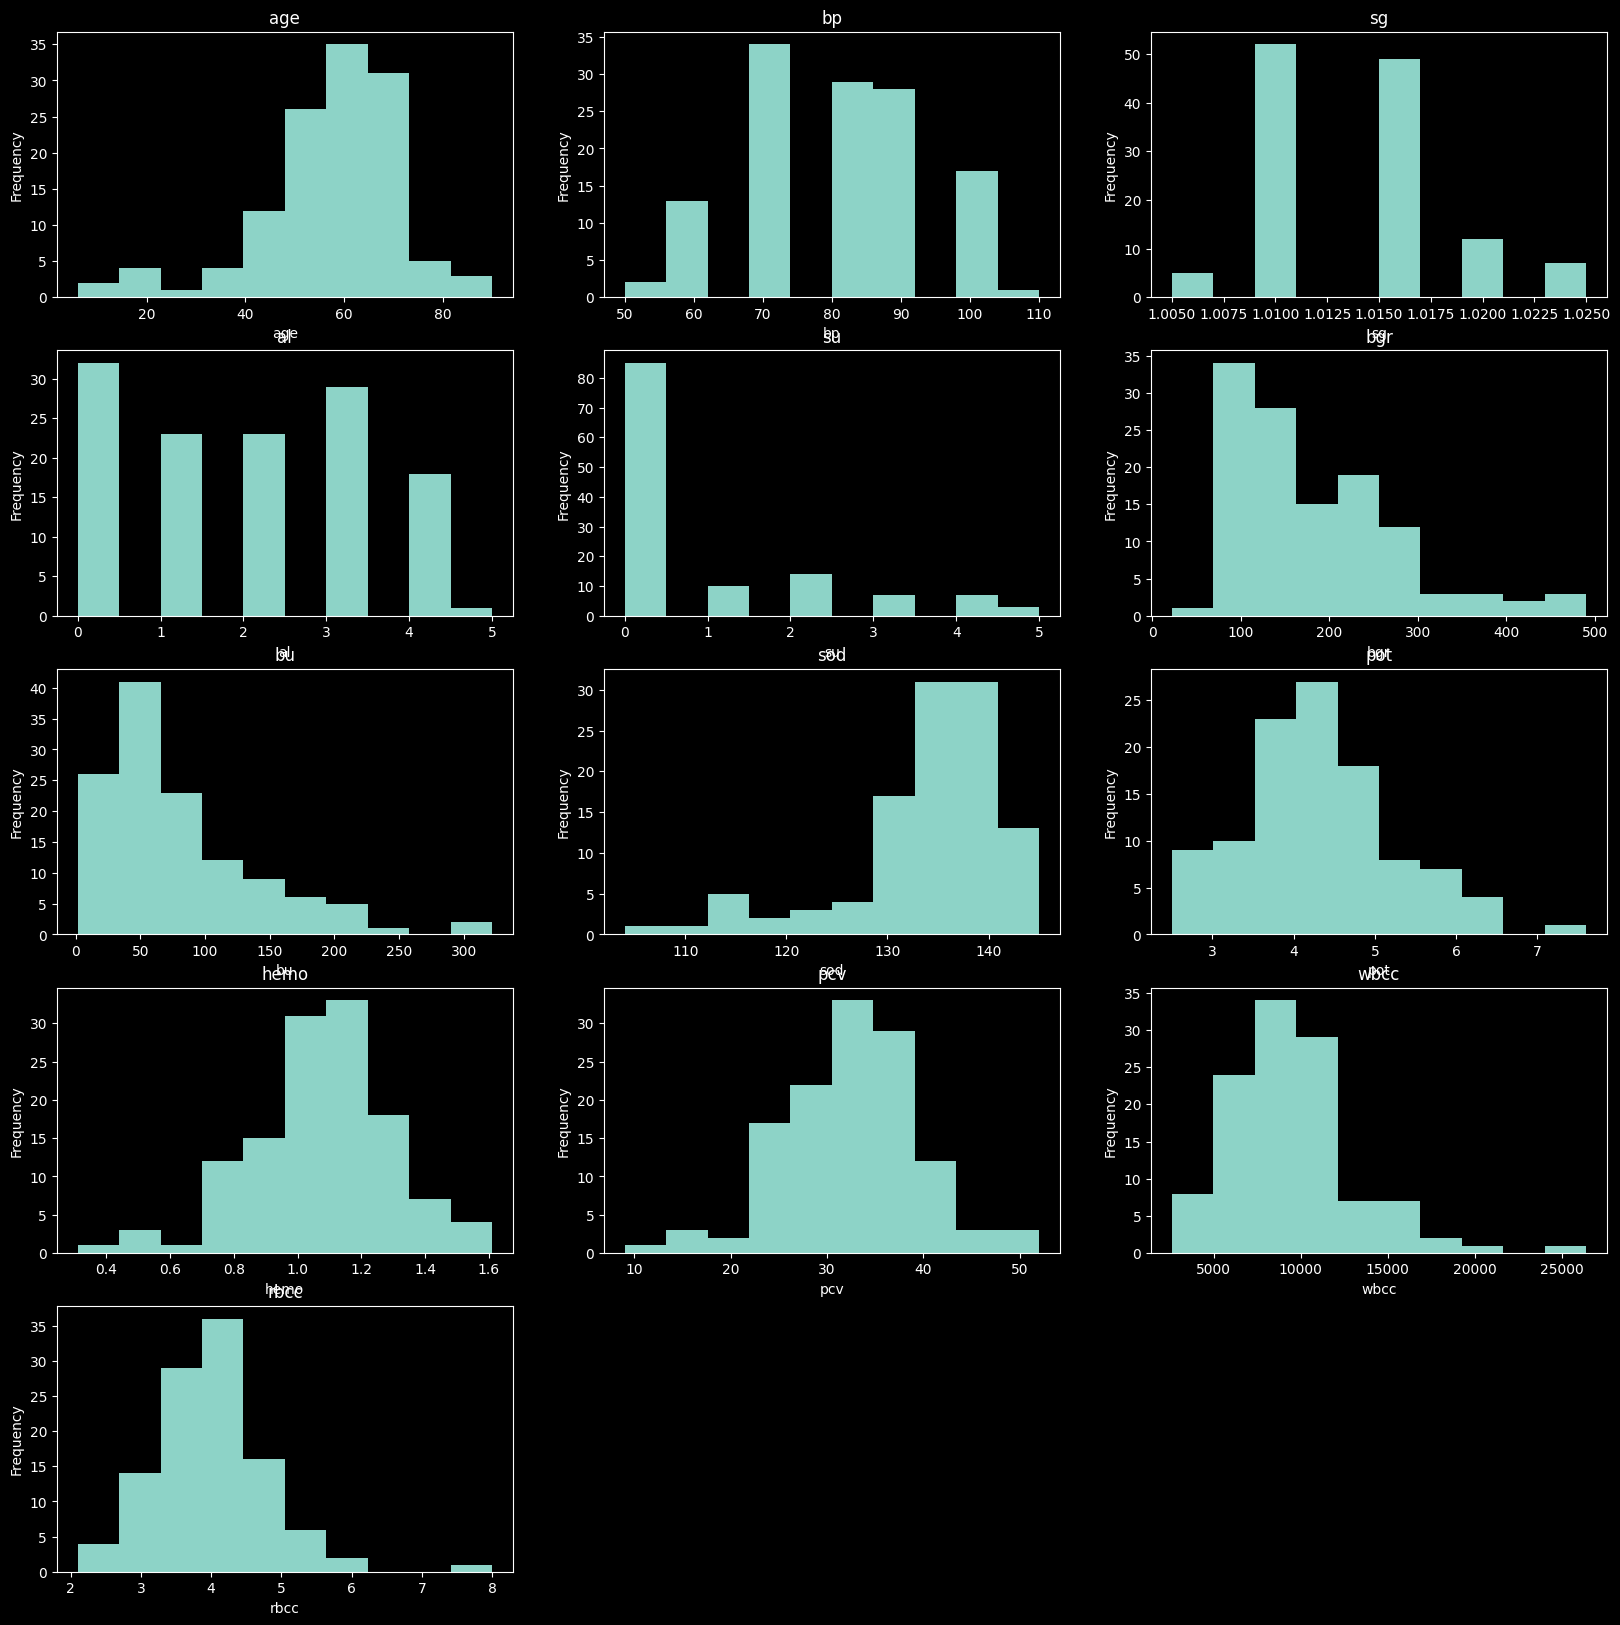

In [282]:
df_a['bp'] = df_a['bp'].apply(lambda x: x if 30 <= x <= 120 else None)
df_a['pot'] = df_a['pot'].apply(lambda x: x if 0 <= x <= 20 else None)
plot_data(df_a)

Luodaan korrelaatiomatriisi affected ryhmälle ja visualisoidaan heatmapin avulla

In [283]:
numeric_df_a = df_a.select_dtypes(include=['number'])
corr_a = numeric_df_a.corr(method='pearson')
corr_a

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.081892,-0.004869,-0.016726,0.138945,0.205133,0.022593,-0.033951,0.112673,-0.006174,-0.044467,0.015848,-0.016616
bp,0.081892,1.000000,0.066651,0.108585,0.077854,-0.030876,0.137702,0.134833,0.118525,-0.135923,-0.123798,-0.066642,0.098050
sg,-0.004869,0.066651,1.000000,-0.061509,-0.044993,-0.083967,-0.037977,0.143235,0.081370,0.114042,0.106808,-0.026688,0.120779
al,-0.016726,0.108585,-0.061509,1.000000,0.115618,0.099096,0.426974,-0.179331,0.214056,-0.371257,-0.329337,0.067898,-0.231920
su,0.138945,0.077854,-0.044993,0.115618,1.000000,0.692159,-0.053597,0.052022,0.007099,0.184927,0.120275,0.103631,0.091519
bgr,0.205133,-0.030876,-0.083967,0.099096,0.692159,1.000000,-0.029130,-0.053968,-0.099062,0.144666,0.097501,0.049505,0.140348
bu,0.022593,0.137702,-0.037977,0.426974,-0.053597,-0.029130,1.000000,-0.320019,0.337082,-0.608652,-0.568745,-0.135999,-0.487755
sod,-0.033951,0.134833,0.143235,-0.179331,0.052022,-0.053968,-0.320019,1.000000,0.054627,0.295139,0.317933,0.019716,0.266934
pot,0.112673,0.118525,0.081370,0.214056,0.007099,-0.099062,0.337082,0.054627,1.000000,-0.367749,-0.375956,-0.205597,-0.308399
hemo,-0.006174,-0.135923,0.114042,-0.371257,0.184927,0.144666,-0.608652,0.295139,-0.367749,1.000000,0.951500,0.071613,0.779202


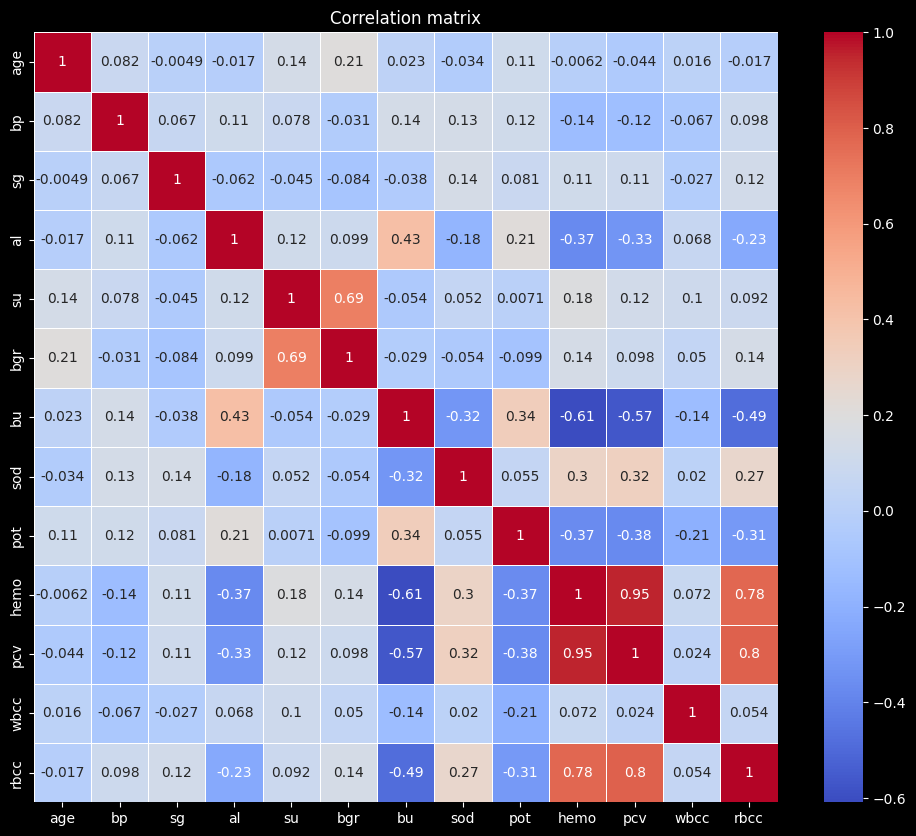

In [284]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(corr_a, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

Luodaan korrelaatiomatriisi control ryhmälle ja visualisoidaan heatmapin avulla

al ja su ei ole mitattuna control ryhmässä

In [285]:
numeric_df_c = df_c.select_dtypes(include=['number'])
corr_c = numeric_df_c.corr(method='pearson')
corr_c

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,-0.071093,-0.092814,NaN,NaN,0.101408,0.078620,0.110581,-0.094361,0.056334,-0.009969,0.128762,-0.045118
bp,-0.071093,1.000000,0.084470,NaN,NaN,0.004094,-0.084057,-0.107489,-0.064606,0.157748,-0.007854,-0.098981,-0.030603
sg,-0.092814,0.084470,1.000000,NaN,NaN,-0.038416,-0.050116,-0.033880,0.074253,0.026303,-0.007082,-0.028054,0.067207
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
su,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bgr,0.101408,0.004094,-0.038416,NaN,NaN,1.000000,-0.067850,-0.007900,0.146784,-0.147729,-0.257604,-0.069143,-0.196675
bu,0.078620,-0.084057,-0.050116,NaN,NaN,-0.067850,1.000000,0.005475,0.047313,0.085647,0.116931,0.041256,-0.010890
sod,0.110581,-0.107489,-0.033880,NaN,NaN,-0.007900,0.005475,1.000000,0.065758,-0.011060,-0.001524,0.338373,-0.092615
pot,-0.094361,-0.064606,0.074253,NaN,NaN,0.146784,0.047313,0.065758,1.000000,0.099223,-0.168690,0.041307,-0.052842
hemo,0.056334,0.157748,0.026303,NaN,NaN,-0.147729,0.085647,-0.011060,0.099223,1.000000,0.057235,-0.191126,0.075912


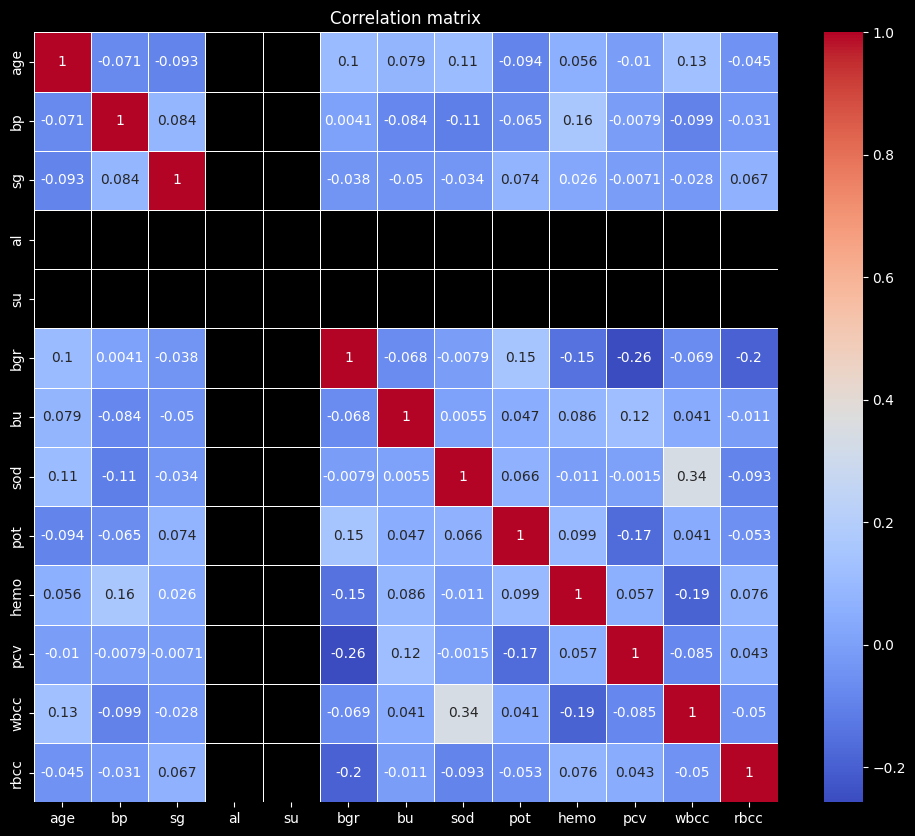

In [286]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(corr_c, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()